In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Prepare the data for Logistic Regression

### Read the relevant data sets

In [4]:
data = pd.read_csv('final_features.csv')

In [5]:
data.shape

(5410, 49)

In [6]:
fraud = pd.read_csv('Train_fraud.csv')

In [7]:
data.head(100)

,Provider,ClaimID,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diag,V5861_diag,2724_diag,4011_diag,2449_diag,4019_diag,25000_diag,42731_diag,4019_proc,9904_proc,2724_proc,8154_proc,66_proc,3893_proc,3995_proc,4516_proc,3722_proc,8151_proc,8872_proc,5_state,10_state,33_state,45_state,14_state,39_state,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_days
0,PRV51001,25,11,5.0,2,3,80.0,8.0,12,1,0,2,0,1,3,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000
1,PRV51003,132,78,62.0,39,48,693.0,29.0,29,7,6,16,3,12,25,15,11,3,0,1,2,1,2,2,1,2,0,0,0,23,0,0,0,0,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242
2,PRV51004,149,28,0.0,0,0,385.0,23.0,76,2,4,12,6,8,22,8,3,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,4,0,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530
3,PRV51005,1165,252,0.0,0,0,3016.0,259.0,565,56,47,73,62,30,140,54,23,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412
4,PRV51007,72,17,3.0,1,1,215.0,11.0,31,2,7,5,3,6,10,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333
5,PRV51008,43,9,2.0,2,2,136.0,10.0,17,0,2,7,2,3,9,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.0,10.0,828.604651,53.860465,0.186047,0.558140,6592.093023,12.000000,12.000000,620.930233,2570.465116,616.046512,3.906977,74.604651,1.534884
6,PRV51011,58,13,1.0,0,0,147.0,12.0,29,0,1,5,2,5,10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53.0,28.0,286.724138,23.586207,0.086207,0.534483,4414.827586,12.000000,12.000000,674.275862,1399.310345,366.724138,4.586207,73.431034,0.551724
7,PRV51012,48,17,0.0,0,0,123.0,7.0,22,1,1,2,2,2,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31.0,15.0,351.875000,2.083333,0.000000,0.770833,6935.416667,12.000000,11.500000,839.916667,3793.958333,735.208333,4.625000,73.541667,3.708333
8,PRV51013,46,12,0.0,0,0,117.0,11.0,19,4,0,2,2,1,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,44.0,9.0,323.478261,5.000000,0.000000,0.739130,3635.652174,12.000000,12.000000,593.304348,3226.521739,914.782609,4.413043,73.413043,1.456522
9,PRV51014,30,5,0.0,0,0,110.0,8.0,8,2,0,2,0,1,6,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.0,8.0,349.333333,4.000000,0.000000,0.766667,2786.333333,12.000000,12.000000,427.200000,1742.333333,649.333333,4.333333,70.200000,0.466667


### Binary code PotentialFraud and merge fraud with data

In [8]:
fraud['PotentialFraud'] = [1 if x == 'Yes' else 0 for x in fraud['PotentialFraud']]

In [73]:
fraud.head()

,Provider,PotentialFraud
0,PRV51001,0
1,PRV51003,1
2,PRV51004,0
3,PRV51005,1
4,PRV51007,0


In [9]:
final_data = pd.merge(data, fraud, how="outer", on="Provider")

In [10]:
final_data.drop(['Provider'],axis=1, inplace=True)

In [11]:
final_data.shape

(5410, 49)

# Logistic Regression Analysis

From https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b

"...evaluation metrics like ROC-AUC curve are a good indicator of classifier performance. It is a measure of how good model is at distinguishing between various class. Higher the ROC-AUC score, better the model is at predicting 0s as 0s and 1s as 1s. Just to remind, ROC is a probability curve and AUC represents degree or measure of separability. Apart from this metric, we will also check on recall score, false-positive (FP) and false-negative (FN) score as we build our classifier."

### Split into train and test for cross-validation

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score, fbeta_score
from sklearn.preprocessing import StandardScaler

# split dataset into x,y
x = final_data.drop(['PotentialFraud'],axis=1)
y = final_data['PotentialFraud']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(x), y, test_size=0.3, random_state=13)

### Default model without class_weight or penalization

In [10]:
# define model
lg1 = LogisticRegression(random_state=13, class_weight=None, max_iter=2000)
# fit it
lg1.fit(X_train,y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))
print(fbeta_score(y_test, y_pred, average='binary', beta=2))
print(fbeta_score(y_test, y_pred, average='binary', beta=1)) #to check for accuracy

Accuracy Score: 0.9309919901417129
Confusion Matrix: 
[[1443   14]
 [  98   68]]
Area Under Curve: 0.7000148845209251
Recall score: 0.40963855421686746
Precision score: 0.8292682926829268
F1 score: 0.5483870967741935
0.688259109311741
0.45576407506702415
0.5483870967741935


In [93]:
y_test.value_counts()

0    1457
1     166
Name: PotentialFraud, dtype: int64

### Weighted model based on proportion of data with majority label (PotentialFraud=0) vs. minority label (PotentialFraud=1)

In [55]:
print("majority label is %f of the data set" %((4904/5410)*100)) #4904 providers are non fraudulent
print("minority label is %f of the data set" %((506/5410)*100)) #506 providers are potentially fraudulent

majority label is 90.646950 of the data set
minority label is 9.353050 of the data set


In [88]:
# define class weights
w = {0:9, 1:91}# define model
lg2 = LogisticRegression(random_state=13, class_weight="balanced", max_iter=2000)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print("F0.5 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=0.5))
print("F2 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=2))

Accuracy Score: 0.8872458410351202
Confusion Matrix: 
[[1310  147]
 [  36  130]]
Area Under Curve: 0.8411201428914009
Recall score: 0.7831325301204819
Precision score: 0.4693140794223827
F1 score: 0.5869074492099322
F0.5 score: 0.510204
F2 score: 0.690755


### Weights GridSearch to identify ideal class_weight parameter

In [12]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [13]:
# define model
lg3 = LogisticRegression(random_state=13, max_iter = 2000)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring='precision', cv=100, refit=True)
grid.fit(StandardScaler().fit_transform(x),y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

Best score: 0.7494761904761904 with param: {'class_weight': {0: 1.0, 1: 1.0}}


From https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b

"Note that optimal value of weights distribution identified by GridSearch is slightly different than what we used before i.e. inverse of class distribution. Factors that played out here are evaluation metric and cross-validation. You might receive a different weights value if you choose to work with a different evaluation metric. Using above weight values, lets build logistic regression."

### Conduct logistic regression with best class_weight parameter

In [14]:
# define model
lg3 = LogisticRegression(random_state=13, class_weight={0: 1, 1: 1}, max_iter=2000)
# fit it
lg3.fit(X_train,y_train)
# test
y_pred = lg3.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print("F0.5 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=0.5))
print("F2 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=2))

Accuracy Score: 0.9309919901417129
Confusion Matrix: 
[[1443   14]
 [  98   68]]
Area Under Curve: 0.7000148845209251
Recall score: 0.40963855421686746
Precision score: 0.8292682926829268
F1 score: 0.5483870967741935
F0.5 score: 0.688259
F2 score: 0.455764


### Tune hyperparameters, including penalization, C, fit_intercept

In [15]:
# define hyperparameters
crange = np.arange(0.5, 2.0, 0.5)
hyperparam_grid = {"C": crange
                   ,"fit_intercept": [True, False]  }

In [16]:
# logistic model classifier
lg4 = LogisticRegression(random_state=13, penalty='l2', class_weight={0: 1.0, 1: 1}, max_iter=2000)
# define evaluation procedure
grid = GridSearchCV(lg4,hyperparam_grid,scoring="precision", cv=100, refit=True)
grid.fit(StandardScaler().fit_transform(x),y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

Best score: 0.7494761904761904 with param: {'C': 1.0, 'fit_intercept': True}


In [13]:
# define model
from sklearn.metrics import fbeta_score
lg4 = LogisticRegression(random_state=13,C=1.0,fit_intercept=True, penalty='l2',class_weight={0: 1.0, 1: 1}, max_iter=2000)
# fit it
lg4.fit(X_train,y_train)
# test
y_pred = lg4.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') # 0.5
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print("F0.5 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=0.5))
print("F2 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=2))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy Score: 0.9309919901417129
Confusion Matrix: 
[[1443   14]
 [  98   68]]
Area Under Curve: 0.7000148845209251
Recall score: 0.40963855421686746
Precision score: 0.8292682926829268
F1 score: 0.5483870967741935
F0.5 score: 0.688259
F2 score: 0.455764
True Negatives:  1443
False Positives:  14
False Negatives:  98
True Positives:  68


In [18]:
# logistic model classifier
lg5 = LogisticRegression(random_state=13, penalty='l1', solver='liblinear', class_weight={0: 1.0, 1: 1}, max_iter=2000)
# define evaluation procedure
grid = GridSearchCV(lg4,hyperparam_grid,scoring="precision", cv=100, refit=True)
grid.fit(StandardScaler().fit_transform(x),y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sjk252/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

Best score: 0.7494761904761904 with param: {'C': 1.0, 'fit_intercept': True}


In [19]:
# define model
lg5 = LogisticRegression(random_state=13,C=1.0,fit_intercept=True, penalty='l1',solver='liblinear',class_weight={0: 1.0, 1: 1}, max_iter=2000)
# fit it
lg5.fit(X_train,y_train)
# test
y_pred = lg5.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') # 0.5
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print("F0.5 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=0.5))
print("F2 score: %f" %fbeta_score(y_test, y_pred, average='binary', beta=2))

Accuracy Score: 0.9285274183610598
Confusion Matrix: 
[[1441   16]
 [ 100   66]]
Area Under Curve: 0.6933044463371675
Recall score: 0.39759036144578314
Precision score: 0.8048780487804879
F1 score: 0.532258064516129
F0.5 score: 0.668016
F2 score: 0.442359


### Get Feature Importance based on ideal model

Feature: 0, Score: 0.69597
Feature: 1, Score: 0.56014
Feature: 2, Score: 0.37687
Feature: 3, Score: 0.28043
Feature: 4, Score: 0.61646
Feature: 5, Score: 0.53136
Feature: 6, Score: 0.31729
Feature: 7, Score: 0.18842
Feature: 8, Score: 0.31411
Feature: 9, Score: 0.23531
Feature: 10, Score: 0.32145
Feature: 11, Score: 0.07542
Feature: 12, Score: 0.12796
Feature: 13, Score: 0.59603
Feature: 14, Score: 0.11364
Feature: 15, Score: 0.52318
Feature: 16, Score: 0.24435
Feature: 17, Score: 0.07056
Feature: 18, Score: 0.05059
Feature: 19, Score: 0.04079
Feature: 20, Score: 0.09755
Feature: 21, Score: 0.03780
Feature: 22, Score: 0.09950
Feature: 23, Score: 0.06496
Feature: 24, Score: 0.13146
Feature: 25, Score: 0.10230
Feature: 26, Score: 0.01327
Feature: 27, Score: 0.23274
Feature: 28, Score: 0.05249
Feature: 29, Score: 0.07959
Feature: 30, Score: 0.02209
Feature: 31, Score: 0.02980
Feature: 32, Score: 0.03873
Feature: 33, Score: 1.07657
Feature: 34, Score: 0.25342
Feature: 35, Score: 0.09338
Fe

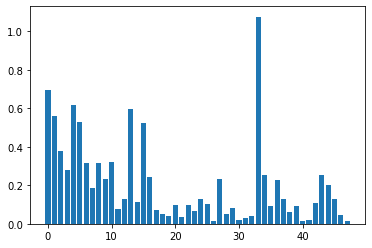

In [14]:
# get importance
importance = abs(lg4.coef_[0])
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#The positive scores indicate a feature that predicts class 1, 
#whereas the negative scores indicate a feature that predicts class 0.

In [15]:
x.columns

Index(['ClaimID', 'ClmAdmitDiagnosisCode', 'Inpatient', 'ClmProcedureCode',
       'ClmProcedureCode_count', 'ClmDiagnosisCode_count',
       'RenalDiseaseIndicator', 'duplicate', 'V5869_diag', 'V5861_diag',
       '2724_diag', '4011_diag', '2449_diag', '4019_diag', '25000_diag',
       '42731_diag', '4019_proc', '9904_proc', '2724_proc', '8154_proc',
       '66_proc', '3893_proc', '3995_proc', '4516_proc', '3722_proc',
       '8151_proc', '8872_proc', '5_state', '10_state', '33_state', '45_state',
       '14_state', '39_state', 'Patient_Connections', 'AttPhys_Connections',
       'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'treatment_days',
       'Gender', 'IPAnnualReimbursementAmt', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'num_chronic',
       'Age', 'claim_days'],
      dtype='object')

### Summary of Feature Importance


The following features are most important in classification of fraud vs. non-fraud. 

- Patient_Connections
- ClaimID
- ClmAdmitDiagnosisCode
- ClmProcedureCode_count
- 42731_diag
- 4019_diag
- Inpatient
- V5869_diag
- ClmProcedureCode
- 2724_diag
- RenalDiseaseIndicator
- V5861_diag
- duplicate
- 4019_proc
- 5_state is the most important state
- AttPhys_Connections
- DeductibleAmtPaid
- OPAnnualReimbursementAmt
- OPAnnualDeductibleAmt



In [16]:
importance_data = pd.DataFrame(importance).reset_index()

In [17]:
importance_data

,index,0
0,0,0.695968
1,1,0.560138
2,2,0.376870
3,3,0.280431
4,4,0.616456
5,5,0.531362
6,6,0.317290
7,7,0.188424
8,8,0.314110
9,9,0.235310


In [18]:
column_data = pd.DataFrame(x.columns).reset_index()

In [50]:
Log_reg_FeatImp = pd.merge(importance_data, column_data, how="outer", on="index").sort_values('0_x', ascending=False)

In [51]:
Log_reg_FeatImp.columns = ['index','LR_importance','feature']

In [52]:
Log_reg_FeatImp.drop('index', axis=1,inplace=True)

In [53]:
Log_reg_FeatImp

,LR_importance,feature
33,1.076565,Patient_Connections
0,0.695968,ClaimID
4,0.616456,ClmProcedureCode_count
13,0.596025,4019_diag
1,0.560138,ClmAdmitDiagnosisCode
5,0.531362,ClmDiagnosisCode_count
15,0.523178,42731_diag
2,0.376870,Inpatient
10,0.321449,2724_diag
6,0.317290,RenalDiseaseIndicator


In [41]:
from matplotlib import pyplot as plt
%matplotlib inline

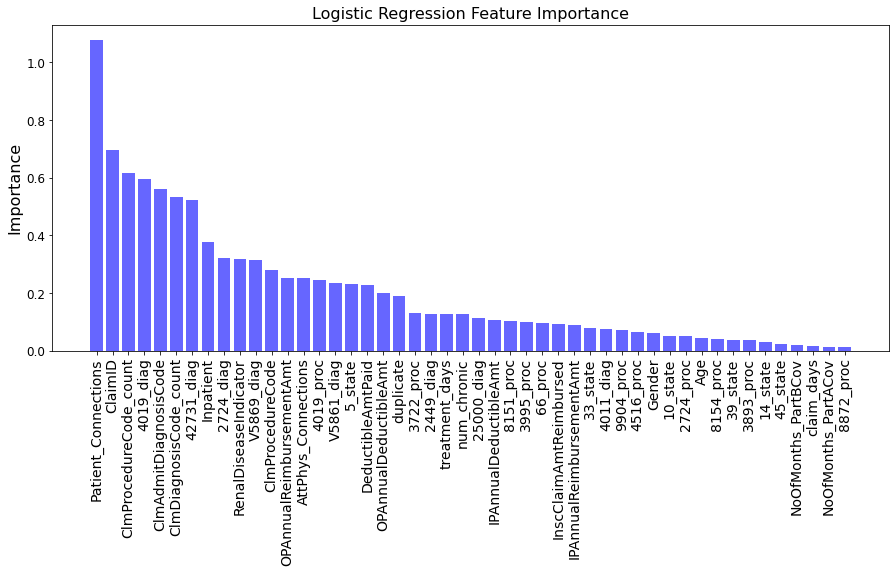

In [74]:
plt.figure(figsize=(15,6))

plt.bar(important_features.feature, important_features.importance, align='center', alpha=0.60, color = 'blue')
plt.xticks(important_features.feature, fontsize=14, rotation = 90)
plt.yticks(fontsize=12)
plt.ylabel('Importance', fontsize=16)
plt.title('Logistic Regression Feature Importance', fontsize=16)

plt.show()

In [85]:
gradient_boosting_FeatImp = {
 'Inpatient' : 0.32, 'ClmProcedureCode_count' : 0.175, '25000_diag' : 0.06, 'ClmProcedureCode' : 0.05, 
    '2724_diag' : 0.04, '42731_diag' : 0.035, 'ClmAdmitDiagnosisCode' : 0.03, 'ClaimID' : 0.025, 'claim_days' : 0.023, 
    'OPAnnualReimbursementAmt' : 0.022, 'InscClaimAmtReimbursed' : 0.021, 'Patient_Connections' : 0.02, 
    'DeductibleAmtPaid' : 0.02, 'treatment_days' : 0.019, 'Gender' : 0.019, 'Age' : 0.018, '2449_diag' : 0.017,
    '4019_proc' : 0.016, 'RenalDiseaseIndicator' : 0.015, 'duplicate' : 0.014, 'V5869_diag' : 0.013, 
    'NoOfMonths_PartACov' : 0.012, 'ClmDiagnosisCode_count' : 0.011, '45_state' : 0.01, 
    '14_state' : 0.0095, '39_state' : 0.009, 'OPAnnualDeductibleAmt' : 0.0085, '8151_proc' : 0.008,
    'NoOfMonths_PartBCov' : 0.0075, 'num_chronic' : 0.007, '2724_proc' : 0.0065, 'IPAnnualReimbursementAmt' : 0.006,
    'AttPhys_Connections' : 0.0055, '8154_proc' : 0.005, '4516_proc' : 0.0045, '66_proc' : 0.004, '3722_proc' : 0.0035,
    'IPAnnualDeductibleAmt' : 0.003, '3995_proc' : 0.0025, 'V5861_diag' : 0.002, '4019_diag' : 0.0015,
    '10_state' : 0.001, '9904_proc' : 0.001, '33_state' : 0.001, '4011_diag' : 0.001, '3893_proc' : 0.0005,
    '8872_proc' : 0.0005, '5_state' : 0.0005}

In [86]:
gradient_boosting_FeatImp = pd.DataFrame.from_dict(gradient_boosting_FeatImp, orient='index').reset_index()
gradient_boosting_FeatImp.columns = ['feature','GBC_importance']

In [87]:
Random_forest_FeatImp = {
 'Inpatient' : 0.09, 'ClmProcedureCode_count' : 0.072, '25000_diag' : 0.031, 'ClmProcedureCode' : 0.057, 
    '2724_diag' : 0.031, '42731_diag' : 0.056, 'ClmAdmitDiagnosisCode' : 0.042, 'ClaimID' : 0.022, 'claim_days' : 0.0218, 
    'OPAnnualReimbursementAmt' : 0.02, 'InscClaimAmtReimbursed' : 0.03, 'Patient_Connections' : 0.022, 
    'DeductibleAmtPaid' : 0.032, 'treatment_days' : 0.041, 'Gender' : 0.0185, 'Age' : 0.0215, '2449_diag' : 0.0395,
    '4019_proc' : 0.021, 'RenalDiseaseIndicator' : 0.029, 'duplicate' : 0.023, 'V5869_diag' : 0.0095, 
    'NoOfMonths_PartACov' : 0.0092, 'ClmDiagnosisCode_count' : 0.031, '45_state' : 0.0023, 
    '14_state' : 0.0025, '39_state' : 0.0025, 'OPAnnualDeductibleAmt' : 0.018, '8151_proc' : 0.0021,
    'NoOfMonths_PartBCov' : 0.01, 'num_chronic' : 0.0207, '2724_proc' : 0.003, 'IPAnnualReimbursementAmt' : 0.028,
    'AttPhys_Connections' : 0.0175, '8154_proc' : 0.0022, '4516_proc' : 0.0018, '66_proc' : 0.0028, '3722_proc' : 0.0015,
    'IPAnnualDeductibleAmt' : 0.025, '3995_proc' : 0.0015, 'V5861_diag' : 0.011, '4019_diag' : 0.0018,
    '10_state' : 0.0028, '9904_proc' : 0.009, '33_state' : 0.0025, '4011_diag' : 0.012, '3893_proc' : 0.0018,
    '8872_proc' : 0.001, '5_state' : 0.003}


In [88]:
Random_forest_FeatImp = pd.DataFrame.from_dict(Random_forest_FeatImp, orient='index').reset_index()
Random_forest_FeatImp.columns = ['feature','RF_importance']

In [89]:
GBC_scaled_features = gradient_boosting_FeatImp.copy()

In [90]:
col_names = ['GBC_importance']
features = GBC_scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [91]:
GBC_scaled_features[col_names] = features

In [92]:
GBC_scaled_features

,feature,GBC_importance
0,Inpatient,5.855130e+00
1,ClmProcedureCode_count,2.996565e+00
2,25000_diag,7.294270e-01
3,ClmProcedureCode,5.322846e-01
4,2724_diag,3.351421e-01
5,42731_diag,2.365709e-01
6,ClmAdmitDiagnosisCode,1.379997e-01
7,ClaimID,3.942849e-02
8,claim_days,-6.839752e-17
9,OPAnnualReimbursementAmt,-1.971424e-02


In [93]:
RF_scaled_features = Random_forest_FeatImp.copy()

In [94]:
col_names = ['RF_importance']
features = RF_scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [95]:
RF_scaled_features[col_names] = features

In [96]:
LR_scaled_features = Log_reg_FeatImp.copy()

In [97]:
col_names = ['LR_importance']
features = LR_scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [98]:
LR_scaled_features[col_names] = features

In [99]:
imp_data1 = pd.merge(GBC_scaled_features, RF_scaled_features, how="outer", on="feature")

In [100]:
imp_data_final = pd.merge(imp_data1, LR_scaled_features, how="outer", on="feature")

In [101]:
imp_data_final.GBC_importance.mean()

-1.2258712563569438e-16

In [102]:
imp_data_final

,feature,GBC_importance,RF_importance,LR_importance
0,Inpatient,5.855130e+00,3.612896,0.771433
1,ClmProcedureCode_count,2.996565e+00,2.684888,1.867794
2,25000_diag,7.294270e-01,0.571090,-0.433133
3,ClmProcedureCode,5.322846e-01,1.911547,0.330126
4,2724_diag,3.351421e-01,0.571090,0.517826
5,42731_diag,2.365709e-01,1.859991,1.440949
6,ClmAdmitDiagnosisCode,1.379997e-01,1.138207,1.610080
7,ClaimID,3.942849e-02,0.107086,2.231649
8,claim_days,-6.839752e-17,0.096775,-0.881317
9,OPAnnualReimbursementAmt,-1.971424e-02,0.003974,0.208317


In [110]:
import seaborn as sns
%matplotlib inline

In [105]:
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])

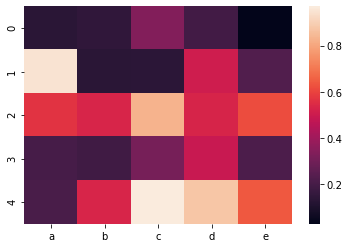

In [106]:
p1 = sns.heatmap(df)

In [82]:
df.head()

,a,b,c,d,e
0,0.250552,0.361507,0.956075,0.058747,0.434643
1,0.534678,0.404531,0.501442,0.519346,0.570748
2,0.859319,0.164162,0.982396,0.204997,0.254097
3,0.152611,0.164246,0.159906,0.493504,0.950808
4,0.808587,0.112702,0.239388,0.905925,0.731165


In [112]:
imp_data_final.set_index('feature')

,GBC_importance,RF_importance,LR_importance
feature,,,
Inpatient,5.855130e+00,3.612896,0.771433
ClmProcedureCode_count,2.996565e+00,2.684888,1.867794
25000_diag,7.294270e-01,0.571090,-0.433133
ClmProcedureCode,5.322846e-01,1.911547,0.330126
2724_diag,3.351421e-01,0.571090,0.517826
42731_diag,2.365709e-01,1.859991,1.440949
ClmAdmitDiagnosisCode,1.379997e-01,1.138207,1.610080
ClaimID,3.942849e-02,0.107086,2.231649
claim_days,-6.839752e-17,0.096775,-0.881317


In [109]:
imp_data_final.dtypes

feature            object
GBC_importance    float64
RF_importance     float64
LR_importance     float64
dtype: object

In [114]:
p2 = sns.heatmap(imp_data_final, annot = True)

TypeError: '<=' not supported between instances of 'str' and 'float'

In [115]:
imp_data_final.style.background_gradient(cmap='Blues')

,feature,GBC_importance,RF_importance,LR_importance
0,Inpatient,5.855130,3.612896,0.771433
1,ClmProcedureCode_count,2.996565,2.684888,1.867794
2,25000_diag,0.729427,0.571090,-0.433133
3,ClmProcedureCode,0.532285,1.911547,0.330126
4,2724_diag,0.335142,0.571090,0.517826
5,42731_diag,0.236571,1.859991,1.440949
6,ClmAdmitDiagnosisCode,0.138000,1.138207,1.610080
7,ClaimID,0.039428,0.107086,2.231649
8,claim_days,-0.000000,0.096775,-0.881317
9,OPAnnualReimbursementAmt,-0.019714,0.003974,0.208317
